# ANN - Prosjektoppgave

### Importerer nødvendige bibliotek

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Preprosesser dataen
- Henter data
- Skalerer data
- Splitter data

In [14]:
training_data = pd.read_csv("data_CRUSHING_100.csv")
validation_data = pd.read_csv("data_CRUSHING_LHS.csv")

scaler = preprocessing.MinMaxScaler().fit(training_data)

training_input_data = scaler.transform(training_data)[:,1:4]
training_output_data = scaler.transform(training_data)[:,4:6]

validation_input_data = scaler.transform(validation_data)[:,1:4]
validation_output_data = scaler.transform(validation_data)[:,4:6]

### Lager modellen
- Input shape: 3
- Output shape: 4
- Loss function: MSE
- Optimizer: ADAM

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=5,activation="relu",input_shape=(3,)))
model.add(tf.keras.layers.Dense(units=5,activation="relu"))
model.add(tf.keras.layers.Dense(units=2,activation="linear"))
                                
model.compile(loss='mse', optimizer='adam')

In [16]:
history = model.fit(
    x=training_input_data, 
    y=training_output_data, 
    epochs=500, 
    verbose=0, 
    validation_data=(validation_input_data, validation_output_data)
    )

1/1 [==============================] - 0s 10ms/step


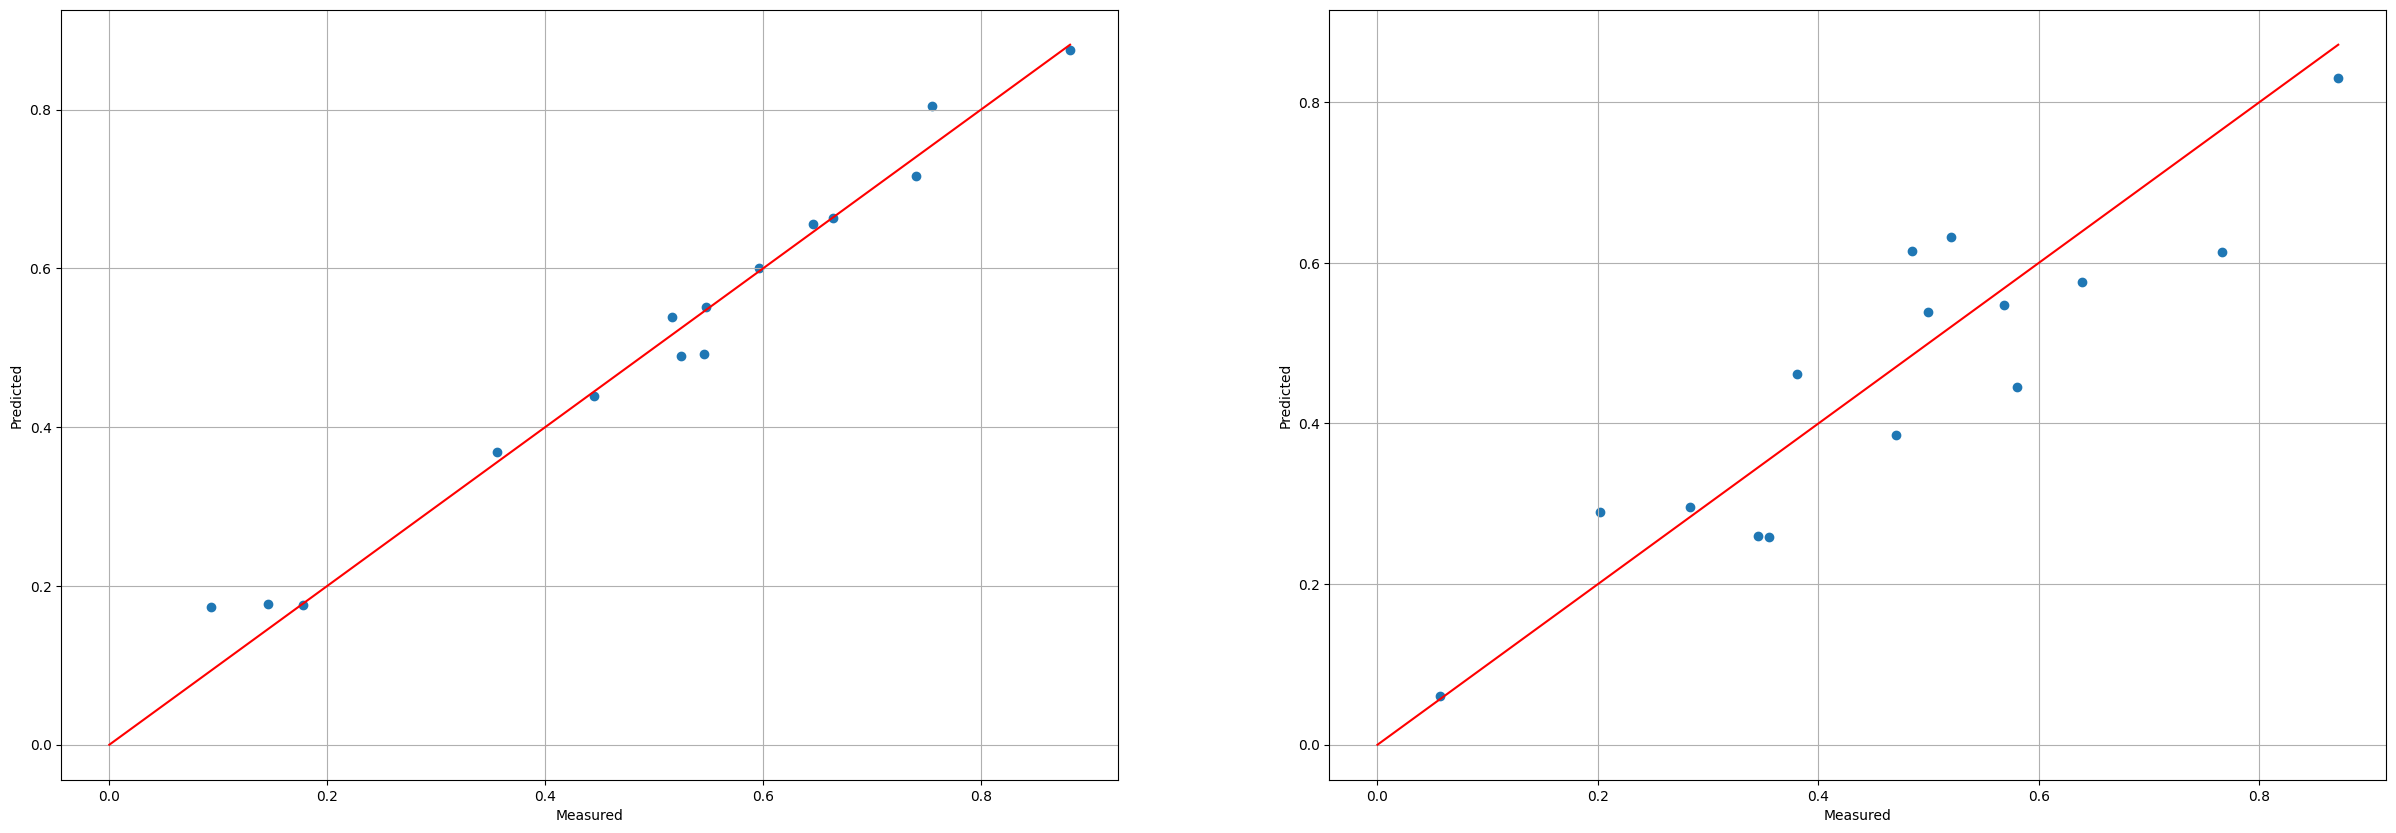

In [17]:
prediction = model.predict(training_input_data)
validation_prediction = model.predict(validation_input_data)

output_data = pd.DataFrame(validation_output_data)
prediction = pd.DataFrame(validation_prediction)

plt.rcParams["figure.figsize"] = (30, 10)
fig,axs = plt.subplots(1,2)
#
axs[0].scatter(output_data.iloc[:,0],prediction.iloc[:,0])
axs[1].scatter(output_data.iloc[:,1],prediction.iloc[:,1])
#axs[2].scatter(output_data.iloc[:,2],prediction.iloc[:,2])
#axs[3].scatter(output_data.iloc[:,3],prediction.iloc[:,3])

#
max_value_0 = np.max([np.max(output_data.iloc[:,0]),np.max(prediction.iloc[:,0])])
max_value_1 = np.max([np.max(output_data.iloc[:,1]),np.max(prediction.iloc[:,1])])
#max_value_2 = np.max([np.max(output_data.iloc[:,2]),np.max(prediction.iloc[:,2])])
#max_value_3 = np.max([np.max(output_data.iloc[:,3]),np.max(prediction.iloc[:,3])])


axs[0].plot([0.0, max_value_0],[0.0, max_value_0],'r')
axs[1].plot([0.0, max_value_1],[0.0, max_value_1],'r')
#axs[2].plot([0.0, max_value_2],[0.0, max_value_2],'r')
#axs[3].plot([0.0, max_value_3],[0.0, max_value_3],'r')

#
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].grid()

axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].grid()

#axs[2].set_xlabel('Measured')
#axs[2].set_ylabel('Predicted')
#axs[2].grid()

#axs[3].set_xlabel('Measured')
#axs[3].set_ylabel('Predicted')
#axs[3].grid()


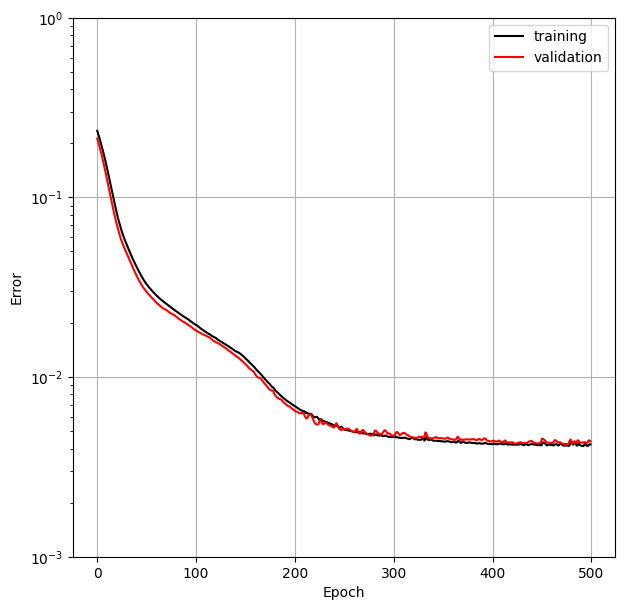

In [18]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.semilogy(history.history['loss'],'k',label='training')
plt.semilogy(history.history['val_loss'],'r',label='validation')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([1e-3,1])
plt.legend()
plt.grid()